In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from skimage.transform import resize
from tqdm import tqdm

In [2]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras import backend as K

In [3]:
class Model():
    def __init__(self):
        K.set_learning_phase(0)
        self.model = ResNet50()
        self.input_size = (224, 224)
        
    def run_on_batch(self, x):
        return self.model.predict(x)

In [4]:
from keras.preprocessing import image

In [5]:
def load_img(path):
    img = image.load_img(path, target_size=model.input_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

In [6]:
def generate_masks(N, s, p1):
    cell_size = np.ceil(np.array(model.input_size) / s)
    up_size = (s + 1) * cell_size

    grid = np.random.rand(N, s, s) < p1
    grid = grid.astype('float32')

    masks = np.empty((N, *model.input_size))

    for i in tqdm(range(N), desc='Generating masks'):
        # Random shifts
        x = np.random.randint(0, cell_size[0])
        y = np.random.randint(0, cell_size[1])
        # Linear upsampling and cropping
        masks[i, :, :] = resize(grid[i], up_size, order=1, mode='reflect',
                                anti_aliasing=False)[x:x + model.input_size[0], y:y + model.input_size[1]]
    masks = masks.reshape(-1, *model.input_size, 1)
    return masks

In [7]:
batch_size = 100

def explain(model, inp, masks):
    preds = []
    # Make sure multiplication is being done for correct axes
    masked = inp * masks
    for i in tqdm(range(0, N, batch_size), desc='Explaining'):
        preds.append(model.run_on_batch(masked[i:min(i+batch_size, N)]))
        print('np.concatenate(preds).shape', np.concatenate(preds).shape)
        print('masks.shape', masks.shape)    
    preds = np.concatenate(preds)
    sal = preds.T.dot(masks.reshape(N, -1)).reshape(-1, *model.input_size)
    sal = sal / N / p1
    return sal

In [8]:
def explain2(model, inp, reference_inp, masks):
    preds = []
    # Make sure multiplication is being done for correct axes
    masked = inp * masks
    for i in tqdm(range(0, N, batch_size), desc='Explaining'):
        preds.append(model.run_on_batch(masked[i:min(i+batch_size, N)]))
    preds = np.concatenate(preds)

    reference_pred = model.run_on_batch(reference_inp)
    distances = pairwise_distances(preds, reference_pred, metric='cosine') / 2
    print('distances.shape', distances.shape)

    sal = distances.T.dot(masks.reshape(N, -1)).reshape(-1, *model.input_size)

    sal = sal / N / p1
    return sal

In [38]:
def explain3(model, inp, reference_inp, masks, batch_size=10):
    preds = []
    # Make sure multiplication is being done for correct axes
    masked = inp * masks
    N = len(masks)
    for i in tqdm(range(0, N, batch_size), desc='Explaining'):
        preds.append(2*model.run_on_batch(masked[i:min(i+batch_size, N)]) -1)
    preds = np.concatenate(preds)

    reference_pred = model.run_on_batch(reference_inp)
    distances = pairwise_distances(preds, reference_pred, metric='cosine') / 2
    print('distances.shape', distances.shape)

    sal = distances.T.dot(masks.reshape(N, -1)).reshape(-1, *model.input_size)

    sal = sal / N / p1
    return sal

In [10]:
from keras.backend import concatenate
import scipy


u = np.array([[1,0]])
v = np.array([[-1,0]])

# [for e in v]
w = np.concatenate((u,v))

scipy.spatial.distance.cosine(u, v, w=None)

2.0

In [11]:
from sklearn.metrics import pairwise_kernels, pairwise_distances
pairwise_distances(u, w, metric='cosine')

array([[0., 2.]])

In [12]:
def class_name(idx):
    return decode_predictions(np.eye(1, 1000, idx))[0][0][1]

In [13]:


model = Model()



/Users/pbos/sw/miniconda3/envs/dianna/lib/python3.9/site-packages/keras/backend.py:414: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [14]:
!wget https://www.lomondhillslabradoodles.co.uk/wp-content/uploads/2018/12/IMG_4531-e1549365547619.jpg

--2022-04-13 11:13:28--  https://www.lomondhillslabradoodles.co.uk/wp-content/uploads/2018/12/IMG_4531-e1549365547619.jpg
Resolving www.lomondhillslabradoodles.co.uk (www.lomondhillslabradoodles.co.uk)... 185.3.164.157
Connecting to www.lomondhillslabradoodles.co.uk (www.lomondhillslabradoodles.co.uk)|185.3.164.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 783182 (765K) [image/jpeg]
Saving to: ‘IMG_4531-e1549365547619.jpg’

IMG_4531-e154936554 100%[===================>] 764.83K  --.-KB/s    in 0.09s   

2022-04-13 11:13:28 (8.01 MB/s) - ‘IMG_4531-e1549365547619.jpg’ saved [783182/783182]



In [15]:
!wget https://www.keystonepuppies.com/wp-content/uploads/2019/05/Tike-Mini-Labradoodle.jpg

--2022-04-13 11:13:30--  https://www.keystonepuppies.com/wp-content/uploads/2019/05/Tike-Mini-Labradoodle.jpg
Resolving www.keystonepuppies.com (www.keystonepuppies.com)... 67.227.148.146
Connecting to www.keystonepuppies.com (www.keystonepuppies.com)|67.227.148.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72816 (71K) [image/jpeg]
Saving to: ‘Tike-Mini-Labradoodle.jpg’

Tike-Mini-Labradood 100%[===================>]  71.11K   335KB/s    in 0.2s    

2022-04-13 11:13:31 (335 KB/s) - ‘Tike-Mini-Labradoodle.jpg’ saved [72816/72816]



In [16]:
urls = ['https://www.keystonepuppies.com/wp-content/uploads/2019/05/Tike-Mini-Labradoodle.jpg',
        'http://pinelodgelabradoodles.com/wp-content/uploads/2018/03/Katie_sq.jpg']
dog1_file_name = 'Tike-Mini-Labradoodle.jpg'
dog2_file_name = 'IMG_4531-e1549365547619.jpg'
# flowers_file_name = 'mc-farm-fresh-flowers-farmers-markets-20150915'

img_dog1, x_dog1 = load_img(dog1_file_name)
img_dog2, x_dog2 = load_img(dog2_file_name)
# img_flowers, x_flowers = load_img(flowers_file_name)


In [18]:
emb_dog1 = model.run_on_batch(x_dog1)
emb_dog2 = model.run_on_batch(x_dog2)
# emb_flowers = model.run_on_batch(x_flowers)

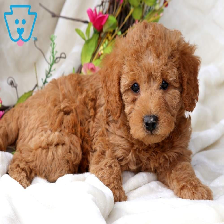

In [19]:
img_dog1

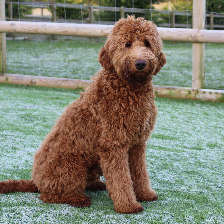

In [20]:
img_dog2

In [21]:
# img_flowers

In [45]:
N = 100
s = 8
p1 = 0.5
masks = generate_masks(N, s, p1)

Generating masks: 100%|██████████| 100/100 [00:00<00:00, 239.92it/s]


In [43]:
sal = explain3(model, x_dog1, x_dog2, masks)

Explaining: 100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


distances.shape (100, 1)


In [33]:
sal.shape


(1, 224, 224)

c*N . N*d => c*d
1*N . N*d => 1*d

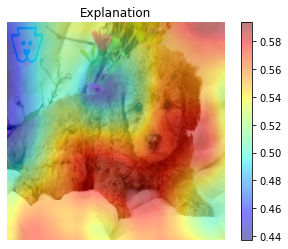

In [51]:
plt.title('Explanation')
plt.axis('off')
plt.imshow(img_dog1)
plt.imshow(sal[0], cmap='jet', alpha=0.5) #, vmin=0, vmax=1)
plt.colorbar()
plt.show()

Let's see what happens with different individual masks. Again without the 2*preds - 1 from explain3, that was maybe not a good idea.

In [57]:
inp = x_dog1
reference_inp = x_dog2

preds = []
# Make sure multiplication is being done for correct axes
masked = inp * masks
N = len(masks)
for i in tqdm(range(0, N, batch_size), desc='Explaining'):
    preds.append(model.run_on_batch(masked[i:min(i+batch_size, N)]))
preds = np.concatenate(preds)

Explaining: 100%|██████████| 1/1 [00:04<00:00,  4.67s/it]

distances.shape (100, 1)


In [198]:
reference_pred = model.run_on_batch(reference_inp)
distances = pairwise_distances(preds, reference_pred, metric='cosine') / 2
print('distances.shape', distances.shape)

sal = distances.T.dot(masks.reshape(N, -1)).reshape(-1, *model.input_size)

sal = sal / N / p1

distances.shape (100, 1)


In [67]:
preds.shape

(100, 1000)

In [66]:
preds.argmax(axis=-1)

array([267, 266, 219, 267, 266, 267, 265, 219, 265, 191, 267, 265, 219,
       184, 191, 267, 267, 184, 219, 219, 184, 219, 219, 265, 265, 184,
       265, 219, 219, 265, 184, 184, 850, 219, 191, 266, 184, 219, 265,
       266, 191, 219, 267, 219, 219, 265, 265, 267, 191, 265, 184, 219,
       265, 267, 219, 219, 184, 219, 184, 191, 267, 219, 265, 265, 265,
       267, 260, 850, 219, 267, 267, 267, 265, 219, 191, 191, 219, 219,
       191, 265, 267, 265, 219, 219, 265, 267, 267, 219, 266, 188, 267,
       265, 207, 219, 219, 219, 219, 184, 267, 266])

Ok, so we mostly get 267 or things there about as the max prediction, which is probably a poodle or something... https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a indeed, "standard poodle", 265 is "toy poodle", 266 is "miniature poodle", etc.

In [72]:
import pandas as pd

In [137]:
def class_name(idx):
    return decode_predictions(np.eye(1, 1000, idx))[0][0][1]

In [158]:
def histogram_of_top_predictions(predictions):
    count, label_indices = np.histogram(predictions.argmax(axis=-1), bins=1000, range=(0, 1000))
    label_indices = label_indices[:-1]
    # non-empty stuff:
    label_indices = label_indices[count != 0]
    count = count[count != 0]
    labels = [class_name(int(ix)) for ix in label_indices]
    zipped = list(zip(labels, count, label_indices))
    return pd.DataFrame(sorted(zipped, key=lambda x: x[1], reverse=True),
                        columns=["label", "count", "label index"])

In [159]:
histogram_of_top_predictions(preds)

,label,count,label index
0,cocker_spaniel,30,219.0
1,toy_poodle,20,265.0
2,standard_poodle,19,267.0
3,Irish_terrier,11,184.0
4,Airedale,9,191.0
5,miniature_poodle,6,266.0
6,teddy,2,850.0
7,wire-haired_fox_terrier,1,188.0
8,golden_retriever,1,207.0
9,chow,1,260.0


Let's see what are typical values for the top predicted classes:

In [107]:
preds[(np.arange(100), preds.argmax(axis=-1))]

array([0.38206464, 0.46159446, 0.45450243, 0.24176736, 0.5567473 ,
       0.30990693, 0.24717551, 0.3971516 , 0.23035519, 0.46052408,
       0.40539795, 0.44627643, 0.59885335, 0.2951486 , 0.3807312 ,
       0.19302718, 0.5576143 , 0.30427358, 0.54531914, 0.28873152,
       0.87896657, 0.44711652, 0.73429924, 0.47546035, 0.5182674 ,
       0.352909  , 0.42243868, 0.61238146, 0.33016458, 0.28513965,
       0.3076752 , 0.59205306, 0.59445614, 0.4162325 , 0.27346092,
       0.38798177, 0.46201822, 0.4150309 , 0.37290335, 0.4906465 ,
       0.5481118 , 0.19671428, 0.42968166, 0.5102708 , 0.44623598,
       0.5404991 , 0.30544308, 0.61207545, 0.36807212, 0.48148403,
       0.27310646, 0.81170475, 0.418858  , 0.33722314, 0.18517223,
       0.55053943, 0.4052692 , 0.35107476, 0.39219138, 0.37282148,
       0.4385746 , 0.74105346, 0.20548368, 0.44222555, 0.38294965,
       0.31671196, 0.38054752, 0.2896648 , 0.51313007, 0.2119901 ,
       0.472681  , 0.79927367, 0.5339824 , 0.9114967 , 0.55907

Does this compare to the reference prediction, i.e. the one without masking?

In [156]:
def list_top_predictions(predictions, N_top=10):
    label_indices = np.argsort(predictions)[-N_top:]
    prediction_values = np.sort(predictions)[-N_top:]
    labels = [class_name(int(ix)) for ix in label_indices]
    return pd.DataFrame(sorted(zip(labels, prediction_values, label_indices), key=lambda x: x[1], reverse=True),
                        columns=["label", "prediction value", "label index"])

In [157]:
list_top_predictions(reference_pred[0])

,label,prediction value,label index
0,Irish_water_spaniel,0.335600,221
1,standard_poodle,0.335331,267
2,Irish_terrier,0.086859,184
3,miniature_poodle,0.073780,266
4,curly-coated_retriever,0.021966,206
5,toy_poodle,0.013646,265
6,otterhound,0.013052,175
7,Airedale,0.009174,191
8,brown_bear,0.006645,294
9,llama,0.005608,355


Yeah, pretty similar values.

Are the distributions similar in the masked predictions?

In [164]:
list_top_predictions(preds[0], N_top=5)

,label,prediction value,label index
0,standard_poodle,0.382065,267
1,cocker_spaniel,0.165719,219
2,miniature_poodle,0.131717,266
3,golden_retriever,0.114455,207
4,Chesapeake_Bay_retriever,0.067205,209


In [163]:
list_top_predictions(preds[1], N_top=5)

,label,prediction value,label index
0,miniature_poodle,0.461594,266
1,standard_poodle,0.302818,267
2,toy_poodle,0.158777,265
3,cocker_spaniel,0.045537,219
4,Irish_terrier,0.006340,184


Yes, not much to see.

In [169]:
distances

array([[0.18480694],
       [0.25437582],
       [0.47566682],
       [0.21429169],
       [0.3681572 ],
       [0.19881326],
       [0.41077277],
       [0.4082697 ],
       [0.33421522],
       [0.4423412 ],
       [0.1759237 ],
       [0.41043937],
       [0.41794398],
       [0.28095102],
       [0.37372103],
       [0.23767704],
       [0.1657063 ],
       [0.34128845],
       [0.42363396],
       [0.41373897],
       [0.40495697],
       [0.4031292 ],
       [0.4842916 ],
       [0.42066836],
       [0.361749  ],
       [0.3451453 ],
       [0.3614962 ],
       [0.45094463],
       [0.27159262],
       [0.33168668],
       [0.40014356],
       [0.39028865],
       [0.44962436],
       [0.34171647],
       [0.35226983],
       [0.26506987],
       [0.3990113 ],
       [0.40930375],
       [0.28633878],
       [0.3615355 ],
       [0.34834144],
       [0.37244436],
       [0.17370245],
       [0.36022997],
       [0.31684268],
       [0.4288958 ],
       [0.33833742],
       [0.146

In [195]:
pd.DataFrame(np.exp(20*distances)).describe()

,0
count,100.000000
mean,2768.206055
std,3727.786865
min,18.808819
25%,299.138199
50%,1373.160950
75%,3545.003906
max,18443.933594


What are the prediction values of the masked image for the top prediction of the reference image, i.e. class 221, the Irish_water_spaniel?

In [170]:
preds[:,221]

array([2.81575229e-03, 3.19970168e-05, 1.63320910e-05, 2.34848878e-04,
       1.39441850e-04, 1.06573694e-04, 4.54350920e-05, 5.27192569e-05,
       7.82394854e-05, 1.10559870e-06, 1.28378998e-03, 6.93250913e-05,
       5.32978214e-04, 3.06492962e-04, 1.44665892e-05, 2.56516942e-05,
       2.94421316e-05, 1.63698041e-05, 4.34027243e-05, 6.44621614e-05,
       6.82082691e-06, 1.65841848e-04, 1.53560759e-05, 1.77392940e-04,
       1.24830021e-05, 1.28788888e-04, 3.38745158e-04, 1.54878653e-04,
       5.14887564e-04, 2.04601074e-05, 6.27593909e-05, 1.59563006e-05,
       1.32332916e-05, 1.31908790e-04, 1.21187310e-04, 5.72984391e-05,
       1.73150198e-04, 2.42825961e-04, 8.12419399e-04, 4.44348188e-05,
       4.17461306e-05, 1.67547514e-05, 3.43262596e-04, 3.43050022e-04,
       3.07162554e-04, 3.63349718e-05, 1.21420519e-04, 5.51772464e-05,
       1.83554275e-05, 1.45724422e-04, 7.52965789e-05, 7.12783294e-05,
       1.61114021e-05, 7.30789498e-06, 9.03525142e-05, 6.74334588e-04,
      

In [177]:
pd.DataFrame(preds[:,221]).describe()

,0
count,100.000000
mean,0.000176
std,0.000336
min,0.000001
25%,0.000038
50%,0.000077
75%,0.000174
max,0.002816


Ok, so pretty low, but still 2 orders of magnitude span.

What about a helicopter (or whatever, just index 1)?

In [171]:
class_name(1)

'goldfish'

Ok, goldfish it is

In [176]:
pd.DataFrame(preds[:,1]).describe()

,0
count,1.000000e+02
mean,3.828351e-05
std,1.111807e-04
min,8.048251e-08
25%,8.203475e-07
50%,2.630348e-06
75%,2.358766e-05
max,6.508197e-04


In [178]:
pd.DataFrame(preds[:,221]).describe()/pd.DataFrame(preds[:,1]).describe()

,0
count,1.000000
mean,4.596385
std,3.018111
min,13.737130
25%,46.595115
50%,29.216545
75%,7.385679
max,4.326470


Ok, disappointing, a goldfish is also pretty low, or just a bit lower, but not by that much compared to the top predictions.

What about the standard-poodle dimension?

In [179]:
pd.DataFrame(preds[:,267]).describe()

,0
count,100.000000
mean,0.169065
std,0.148013
min,0.006590
25%,0.065735
50%,0.118865
75%,0.236182
max,0.799274


That's more like the reference image.

So, now, what happens with these values to produce such limited/narrow ranges of values in the produced saliency maps? And also why do they not seem to explain much at all?

Let's try the dot product thingy on just one prediction to see what it does.

In [187]:
distances[0,None].T.dot(masks[0:1].reshape(1, -1)).reshape(-1, *model.input_size)

array([[[0.16573956, 0.17160644, 0.17747333, ..., 0.06291771,
         0.06510615, 0.06729459],
        [0.16573956, 0.17160644, 0.17747333, ..., 0.0682724 ,
         0.0706471 , 0.07302179],
        [0.16573956, 0.17160644, 0.17747333, ..., 0.0736271 ,
         0.07618805, 0.07874899],
        ...,
        [0.17739185, 0.17967341, 0.18195498, ..., 0.168673  ,
         0.17453989, 0.18040677],
        [0.17678653, 0.17925436, 0.18172217, ..., 0.168673  ,
         0.17453989, 0.18040677],
        [0.17618122, 0.17883529, 0.18148936, ..., 0.168673  ,
         0.17453989, 0.18040677]]])

In [188]:
distances[0]

array([0.18480694], dtype=float32)

In [190]:
masks[0:1].shape

(1, 224, 224, 1)

Based on the observation that the values of the cosine distance are all similar, combined with the fact that these are multiplied by the masks lead us to the hypothesis that this is the problem, namely that you're essentially just adding up the random masks without real strong meaningful "weights" (the distance values) to actually distinguish useful masks from useless ones.

Based on this realization, we hypothesized that blowing up the distances with a huge exponential would certainly solve matters. To test this properly, we have to also do it with more masks.

In [199]:
def explain4(model, inp, reference_inp, masks, batch_size=10):
    preds = []
    # Make sure multiplication is being done for correct axes
    masked = inp * masks
    N = len(masks)
    for i in tqdm(range(0, N, batch_size), desc='Explaining'):
        preds.append(model.run_on_batch(masked[i:min(i+batch_size, N)]))
    preds = np.concatenate(preds)

    reference_pred = model.run_on_batch(reference_inp)
    distances = pairwise_distances(preds, reference_pred, metric='cosine') / 2
    distances = np.exp(20 * distances)
    print('distances.shape', distances.shape)

    sal = distances.T.dot(masks.reshape(N, -1)).reshape(-1, *model.input_size)

    sal = sal / N / p1
    return sal

In [203]:
s = 8
p1 = 0.5
masks4 = generate_masks(1000, s, p1)

Generating masks: 100%|██████████| 1000/1000 [00:03<00:00, 274.24it/s]


In [202]:
sal4 = explain4(model, x_dog1, x_dog2, masks4)

Explaining: 100%|██████████| 100/100 [01:16<00:00,  1.31it/s]


distances.shape (1000, 1)


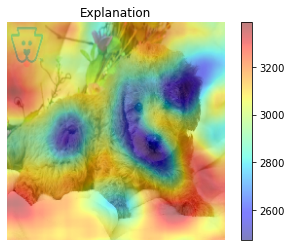

In [204]:
plt.title('Explanation')
plt.axis('off')
plt.imshow(img_dog1)
plt.imshow(sal4[0], cmap='jet', alpha=0.5) #, vmin=0, vmax=1)
plt.colorbar()
plt.show()

Hmm, ok, this is perhaps something like a pattern... is it stable though? Let's try another set of masks:

In [205]:
s = 8
p1 = 0.5
masks4_2 = generate_masks(1000, s, p1)

Generating masks: 100%|██████████| 1000/1000 [00:03<00:00, 280.92it/s]


In [206]:
sal4_2 = explain4(model, x_dog1, x_dog2, masks4)

Explaining: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


distances.shape (1000, 1)


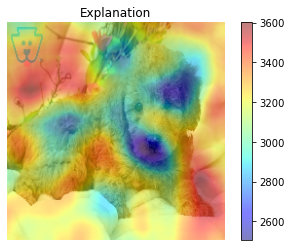

In [207]:
plt.title('Explanation')
plt.axis('off')
plt.imshow(img_dog1)
plt.imshow(sal4_2[0], cmap='jet', alpha=0.5) #, vmin=0, vmax=1)
plt.colorbar()
plt.show()

Hm, interesting, that is actually pretty similar... But what does it mean? Why are the parts that should bring it closer to the other image (furry ear, snout, furry haunch) low values?

Oh, is it because those are low distances?! :D